# Logistic Regression - Predict if a person will develop Nonalcoholic steatohepatitis(NASH)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The choosen algorithm
from sklearn.linear_model import LogisticRegression

# Spliting the data to train and test data
from sklearn.model_selection import train_test_split

# Feature selection and Standardisation
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\ivanr\OneDrive\Desktop\Main(2nd sem) Special Problem\Datasets\Liver Detection Data\Main Data Frame\steatotest_hepatitis_dataset.csv')
print(len(df))
df.head(n = 10)

731


,patient_id,patient_id.1,steatosis_score_0,hbsag_status_1,gender_1,age_0,afp_0,dcp_0,triglycerides_0,total_cholesterol_0,...,sgot_ast_0,total_bilirubin_0,wbc_0,neutrophils_0,lymphocytes_0,monocytes_0,eosinophils_0,basophils_0,platelets_0,inr_0
0,L1900011NKTI,L1900011NKTI,0,0,1,58,1.58,16,0.700000,6.030044,...,17.4,13.680,4.19,56.500000,33.700001,7.4,1.7,0.7,249,0.98
1,L19000210PGH,L19000210PGH,0,0,1,25,0.58,25,0.540000,4.229992,...,19.2,5.301,7.42,68.199997,25.500000,5.8,0.0,0.5,307,0.96
2,L2000031NKTI,L2000031NKTI,2,1,1,46,1.33,26,2.310056,4.540016,...,36.1,6.780,10.72,52.500000,38.200001,6.1,2.4,0.8,362,1.02
3,L2000041NKTI,L2000041NKTI,0,1,1,39,1.49,11,1.410056,5.219891,...,24.0,8.080,10.77,56.099998,38.299999,4.6,0.6,0.4,251,1.04
4,L2000051NKTI,L2000051NKTI,3,1,1,37,1.41,25,3.380000,6.039886,...,46.2,9.610,12.57,56.400002,28.200001,6.4,8.4,0.6,311,0.95
5,L2000061NKTI,L2000061NKTI,2,1,1,33,1.66,12,1.300000,4.720021,...,27.4,7.840,7.62,47.400002,32.900002,11.0,7.5,1.2,417,1.00
6,L2000071TMCP,L2000071TMCP,2,1,0,30,5.56,30,1.080000,5.180005,...,153.5,22.640,7.11,63.200001,24.600000,9.8,2.0,0.4,134,1.19
7,L2000081TMCP,L2000081TMCP,3,1,0,29,1.16,37,2.080000,5.780109,...,58.2,15.890,7.95,69.300003,19.700001,7.8,2.4,0.8,306,1.01
8,L2000091TMCP,L2000091TMCP,0,1,0,26,0.58,28,1.330056,4.500129,...,40.7,10.050,6.00,52.900002,35.299999,5.2,6.3,0.3,329,0.98
9,L20001010PGH,L20001010PGH,1,1,0,42,1.58,44,0.840000,6.140119,...,79.5,9.180,6.61,65.500000,27.400000,5.9,0.6,0.6,261,0.99


# Data Preprocessing

### Classify Cirrhosis and Fibrosis as NASH

1 is positive in NASH and 0 is Negative in NASH

In [3]:
df['steatosis_score_0'] = df['steatosis_score_0'].map({0:0,1:1,2:1,3:1}) 
df = df.rename(columns = {"steatosis_score_0": "NASH"})
df.head(n=10)

,patient_id,patient_id.1,NASH,hbsag_status_1,gender_1,age_0,afp_0,dcp_0,triglycerides_0,total_cholesterol_0,...,sgot_ast_0,total_bilirubin_0,wbc_0,neutrophils_0,lymphocytes_0,monocytes_0,eosinophils_0,basophils_0,platelets_0,inr_0
0,L1900011NKTI,L1900011NKTI,0,0,1,58,1.58,16,0.700000,6.030044,...,17.4,13.680,4.19,56.500000,33.700001,7.4,1.7,0.7,249,0.98
1,L19000210PGH,L19000210PGH,0,0,1,25,0.58,25,0.540000,4.229992,...,19.2,5.301,7.42,68.199997,25.500000,5.8,0.0,0.5,307,0.96
2,L2000031NKTI,L2000031NKTI,1,1,1,46,1.33,26,2.310056,4.540016,...,36.1,6.780,10.72,52.500000,38.200001,6.1,2.4,0.8,362,1.02
3,L2000041NKTI,L2000041NKTI,0,1,1,39,1.49,11,1.410056,5.219891,...,24.0,8.080,10.77,56.099998,38.299999,4.6,0.6,0.4,251,1.04
4,L2000051NKTI,L2000051NKTI,1,1,1,37,1.41,25,3.380000,6.039886,...,46.2,9.610,12.57,56.400002,28.200001,6.4,8.4,0.6,311,0.95
5,L2000061NKTI,L2000061NKTI,1,1,1,33,1.66,12,1.300000,4.720021,...,27.4,7.840,7.62,47.400002,32.900002,11.0,7.5,1.2,417,1.00
6,L2000071TMCP,L2000071TMCP,1,1,0,30,5.56,30,1.080000,5.180005,...,153.5,22.640,7.11,63.200001,24.600000,9.8,2.0,0.4,134,1.19
7,L2000081TMCP,L2000081TMCP,1,1,0,29,1.16,37,2.080000,5.780109,...,58.2,15.890,7.95,69.300003,19.700001,7.8,2.4,0.8,306,1.01
8,L2000091TMCP,L2000091TMCP,0,1,0,26,0.58,28,1.330056,4.500129,...,40.7,10.050,6.00,52.900002,35.299999,5.2,6.3,0.3,329,0.98
9,L20001010PGH,L20001010PGH,1,1,0,42,1.58,44,0.840000,6.140119,...,79.5,9.180,6.61,65.500000,27.400000,5.9,0.6,0.6,261,0.99


# Check data imbalance

AxesSubplot(0.125,0.125;0.775x0.755)


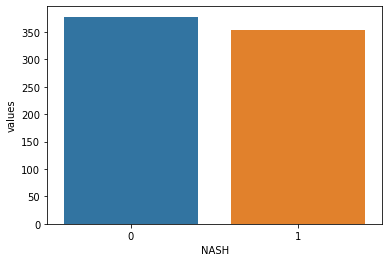

In [4]:
temp = df['NASH'].value_counts()
temp_df = pd.DataFrame({'NASH':temp.index,'values': temp.values})
print(sns.barplot(x= 'NASH', y= 'values', data = temp_df))

# Data Analysis

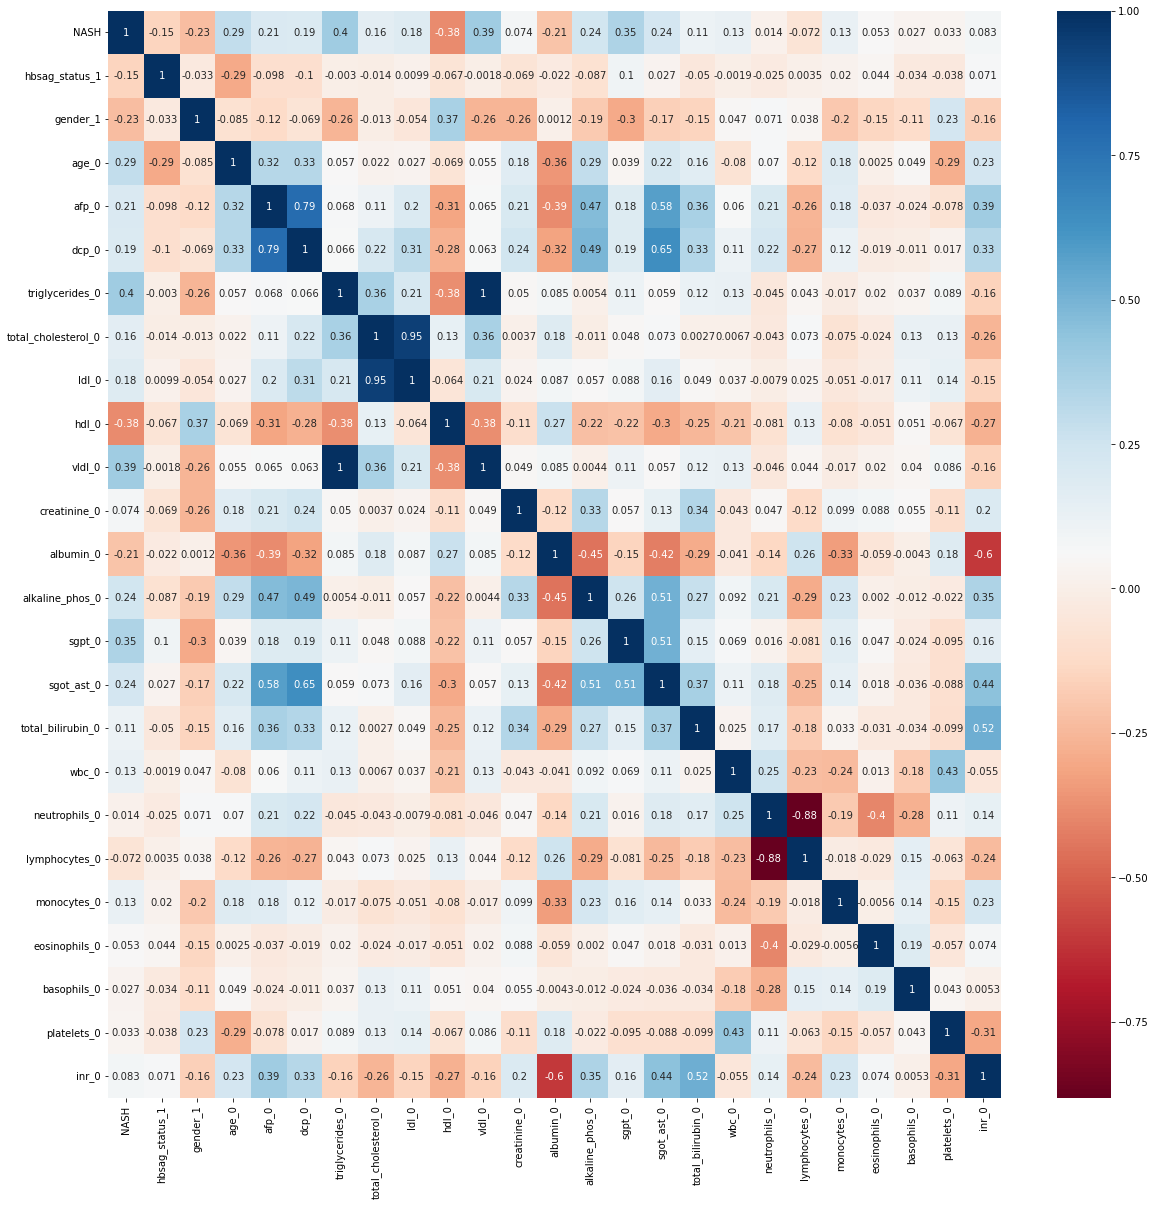

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap="RdBu", annot=True)
plt.show()

# Explore the linearity of features based on the heatmap

triglycerides_0 and vldl_0

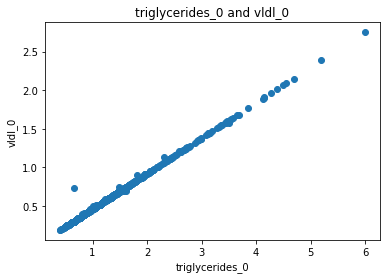

In [7]:
plt.scatter(df["triglycerides_0"], df["vldl_0"])
plt.xlabel('triglycerides_0')
plt.ylabel('vldl_0')
plt.title('triglycerides_0 and vldl_0')
plt.show()

ldl_0 and total_cholesterol_0

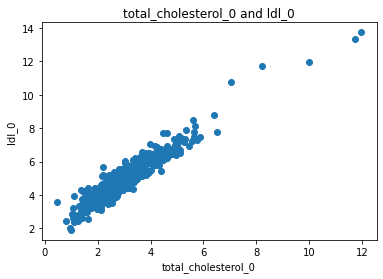

In [8]:
plt.scatter(df["ldl_0"], df["total_cholesterol_0"])
plt.xlabel('total_cholesterol_0')
plt.ylabel('ldl_0 ')
plt.title('total_cholesterol_0 and ldl_0')
plt.show()

neutrophils_0 and lymphocytes_0

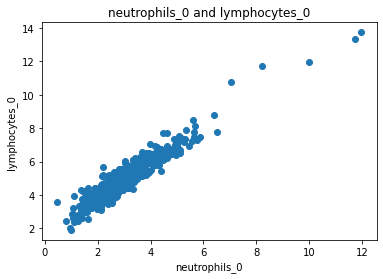

In [9]:
plt.scatter(df["ldl_0"], df["total_cholesterol_0"])
plt.xlabel('neutrophils_0')
plt.ylabel('lymphocytes_0 ')
plt.title('neutrophils_0 and lymphocytes_0')
plt.show()

# Person's Correlation

In [10]:
corr, p_value = pearsonr(df['triglycerides_0'], df['vldl_0'])
print(f"Pearson correlation coefficient of triglycerides_0 and vldl_0: {corr:.2f}")

corr, p_value = pearsonr(df['ldl_0'], df['total_cholesterol_0'])
print(f"Pearson correlation coefficient of ldl_0 and total_cholesterol_0: {corr:.2f}")

corr, p_value = pearsonr(df['neutrophils_0'], df['lymphocytes_0'])
print(f"Pearson correlation coefficient of neutrophils_0 and lymphocytes_0: {corr:.2f}")

Pearson correlation coefficient of triglycerides_0 and vldl_0: 1.00
Pearson correlation coefficient of ldl_0 and total_cholesterol_0: 0.95
Pearson correlation coefficient of neutrophils_0 and lymphocytes_0: -0.88


# Drop the redundant data and data that didn't affect our model

In [11]:
columns_to_drop = ["triglycerides_0","ldl_0","neutrophils_0","patient_id","patient_id.1",
                  'wbc_0','monocytes_0', 'creatinine_0','basophils_0','lymphocytes_0']
                  
for col in columns_to_drop:
    del df[col]


# Checkpoint to preprocess data

In [12]:
df_preprocess = df.copy()
df_preprocess.head(n = 5)

,NASH,hbsag_status_1,gender_1,age_0,afp_0,dcp_0,total_cholesterol_0,hdl_0,vldl_0,albumin_0,alkaline_phos_0,sgpt_0,sgot_ast_0,total_bilirubin_0,eosinophils_0,platelets_0,inr_0
0,0,0,1,58,1.58,16,6.030044,2.689977,0.318829,44.37,69.48,13.500000,17.4,13.680,1.7,249,0.98
1,0,0,1,25,0.58,25,4.229992,1.490028,0.249158,44.92,69.70,9.800000,19.2,5.301,0.0,307,0.96
2,1,1,1,46,1.33,26,4.540016,1.049987,1.055944,45.76,91.35,46.299999,36.1,6.780,2.4,362,1.02
3,0,1,1,39,1.49,11,5.219891,1.739964,0.647501,47.47,65.11,17.299999,24.0,8.080,0.6,251,1.04
4,1,1,1,37,1.41,25,6.039886,0.910127,1.543901,48.26,67.95,82.800003,46.2,9.610,8.4,311,0.95


# Select Input and target

In [13]:
data_with_target = df_preprocess.copy()

In [14]:
targets = data_with_target.iloc[:, 0]

In [15]:
unscaled_inputs = data_without_target = df.iloc[:, 1:]

# Standardize the data

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomScaler(BaseEstimator, TransformerMixin):

    def __init__(self, columns=None, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy=copy, with_mean=with_mean, with_std=with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

    def __repr__(self):
        return f"CustomScaler(columns={self.columns}, mean_={self.mean_}, var_={self.var_})"



In [17]:
unscaled_inputs.columns.values

array(['hbsag_status_1', 'gender_1', 'age_0', 'afp_0', 'dcp_0',
       'total_cholesterol_0', 'hdl_0', 'vldl_0', 'albumin_0',
       'alkaline_phos_0', 'sgpt_0', 'sgot_ast_0', 'total_bilirubin_0',
       'eosinophils_0', 'platelets_0', 'inr_0'], dtype=object)

In [18]:
columns_to_scale = ['age_0', 'afp_0', 'dcp_0','total_cholesterol_0', 'hdl_0', 
                    'vldl_0','albumin_0', 'alkaline_phos_0', 'sgpt_0', 'sgot_ast_0',
                    'total_bilirubin_0','eosinophils_0', 'platelets_0', 'inr_0']

In [19]:
steatosis_scaler = CustomScaler(columns_to_scale)

In [20]:
steatosis_scaler.fit(unscaled_inputs)

CustomScaler(columns=['age_0', 'afp_0', 'dcp_0', 'total_cholesterol_0', 'hdl_0', 'vldl_0', 'albumin_0', 'alkaline_phos_0', 'sgpt_0', 'sgot_ast_0', 'total_bilirubin_0', 'eosinophils_0', 'platelets_0', 'inr_0'], mean_=age_0                    39.872777
afp_0                   138.177538
dcp_0                  2948.793434
total_cholesterol_0       4.939944
hdl_0                     1.293270
vldl_0                    0.645928
albumin_0                44.145472
alkaline_phos_0          97.424295
sgpt_0                   43.840424
sgot_ast_0               43.238057
total_bilirubin_0        15.000014
eosinophils_0             3.990356
platelets_0             285.103967
inr_0                     1.005841
dtype: float64, var_=age_0                  1.665488e+02
afp_0                  3.913837e+05
dcp_0                  2.430724e+08
total_cholesterol_0    1.453451e+00
hdl_0                  1.315357e-01
vldl_0                 1.162453e-01
albumin_0              2.418474e+01
alkaline_phos_0      

In [21]:
scaled_inputs = steatosis_scaler.transform(unscaled_inputs)

# Split the data into train & test and shuffle

In [22]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)

# Model Formulation

### Logistic Regression

In [23]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [24]:
log_reg.score(x_train, y_train)

0.8476027397260274

In [25]:
log_reg.score(x_test, y_test)


0.8027210884353742

# Probability Prediction of the Test Data Set

In [26]:
# Assuming the arrays x_test and y_test are already defined
y_pred = log_reg.predict(x_test)
y_prob = log_reg.predict_proba(x_test)[:, 1]

# Create DataFrame with test data, predictions, and probabilities
results_df = pd.DataFrame(x_test, columns=[ 'hbsag_status_1', 'gender_1', 'age_0', 'afp_0', 'dcp_0','total_cholesterol_0', 'hdl_0', 
                                            'vldl_0','albumin_0', 'alkaline_phos_0', 'sgpt_0', 'sgot_ast_0',
                                           'total_bilirubin_0','eosinophils_0', 'platelets_0', 'inr_0'])

# Assuming the arrays x_test and y_test are already defined
y_prob = log_reg.predict_proba(x_test)[:, 1]
y_pred = log_reg.predict(x_test)



# Concatenate the dataframes horizontally
result_df = pd.concat([results_df, y_test], axis=1)
results_df['Actual'] = y_test
results_df['Probability'] = y_prob
results_df['Prediction'] = y_pred



results_df



,hbsag_status_1,gender_1,age_0,afp_0,dcp_0,total_cholesterol_0,hdl_0,vldl_0,albumin_0,alkaline_phos_0,sgpt_0,sgot_ast_0,total_bilirubin_0,eosinophils_0,platelets_0,inr_0,Actual,Probability,Prediction
283,1,1,-0.532551,-0.217689,-0.187726,-0.705002,-1.167067,0.657204,-0.680278,-0.449826,-0.521900,-0.267078,-0.262485,-0.558111,0.010219,-0.043682,1,0.497583,0
453,1,1,-0.765013,-0.219815,-0.187726,0.132761,0.845735,-0.955947,-0.619275,-0.718858,-0.524071,-0.275722,-0.188512,0.099822,0.637471,0.479789,0,0.047134,0
266,1,0,0.319806,-0.219271,-0.187662,0.149351,-0.808623,-0.486667,1.204711,-0.228270,-0.480653,-0.176314,0.102607,-0.314432,-0.172254,0.105881,0,0.155443,0
269,0,1,-1.152448,-0.219671,-0.188111,-1.949204,-1.222212,-0.779967,-0.531838,-0.418175,-0.500191,-0.265637,-0.143174,-0.192593,1.333150,-0.043682,0,0.320135,0
120,1,0,1.637087,-0.217161,-0.188431,-0.207321,-0.284743,-0.545327,0.226632,-0.323223,-0.591370,-0.238264,-0.143174,-0.095121,-0.947766,-0.043682,0,0.210206,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1,0,-0.687526,-0.217545,-0.187662,0.812925,-0.588042,0.950504,0.879363,0.040762,1.295166,0.084453,-0.140787,0.124189,0.762921,-0.641935,1,0.989754,1
308,1,1,0.242319,-0.219415,-0.187982,-1.368577,-1.718519,-0.457337,-2.506299,0.626302,-0.702087,-0.329028,-0.226692,-0.631215,3.728112,1.526732,1,0.892074,1
77,1,1,0.319806,-0.217817,-0.188111,0.605586,1.314491,0.150465,0.281534,-0.265144,-0.613079,-0.208009,-0.096165,-0.265696,-0.708270,-0.193246,0,0.086042,0
425,0,1,0.164832,-0.220070,-0.187790,-1.219272,-0.146880,-0.750637,0.360838,-0.275747,-0.476311,-0.321825,-0.202829,-0.387536,0.500616,-0.193246,0,0.268926,0


results_df[['age_0', 'Probability', 'Prediction']].to_csv('age_prediction.csv', index=False)
results_df[['gender_1','sgpt_0','Probability', 'Prediction']].to_csv('sgpt_prediction.csv', index=False)


### Manually check accuracy

In [27]:
model_outputs = log_reg.predict(x_test)
np.sum((model_outputs == y_test))/ model_outputs.shape[0]

0.8027210884353742

# Finding the intercept and coefficients

In [28]:
log_reg.intercept_

array([1.09824688])

In [29]:
log_reg.coef_

array([[-1.04175515,  0.2908765 ,  0.72481372,  0.19760191,  0.40471255,
         0.47860513, -0.87607791,  0.89410889, -0.60897926,  0.66047594,
         2.69343414, -0.66135159, -0.17788268,  0.12956243,  0.36480823,
        -0.20842756]])

In [30]:
feature_name = unscaled_inputs.columns.values
summary_table = pd.DataFrame (columns=["Feature name"], data = feature_name)
summary_table["Coefficients"] = np.transpose(log_reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ["Intercept", log_reg.intercept_[0]]
summary_table = summary_table.sort_index()

# Interpreting the Coeffients

In [31]:
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
summary_table.sort_values('Odds_ratio', ascending = False)
summary_table

,Feature name,Coefficients,Odds_ratio
0,Intercept,1.098247,2.998904
1,hbsag_status_1,-1.041755,0.352835
2,gender_1,0.290876,1.337599
3,age_0,0.724814,2.064347
4,afp_0,0.197602,1.218477
5,dcp_0,0.404713,1.498872
6,total_cholesterol_0,0.478605,1.613822
7,hdl_0,-0.876078,0.416413
8,vldl_0,0.894109,2.445156
9,albumin_0,-0.608979,0.543906
